In [1]:
base_dir = "/home/parth/Machine Learning/Datasets/North Corp/Ajanta"

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from datetime import datetime
import os
#from sklearn.cluster import DBSCAN
#from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from geopy.distance import distance
geolocator = Nominatim(user_agent="NorthCorpNew1")


In [4]:
distance(*(data.Position.iloc[0] , data.Position.iloc[10])).km

AttributeError: 'DataFrame' object has no attribute 'Position'

In [41]:
(data.Position.iloc[0] , data.Position.iloc[10])

((19.2504, 73.0431), (19.2495, 73.044))

In [42]:
distance((0,0) , (0,0)).km

0.0

In [3]:
file = os.path.join(base_dir , os.listdir(base_dir)[0])
data = pd.read_csv(file)

In [44]:
data["dataSeconds"] = data["updateddate"].apply(lambda x : datetime.strptime(x , "%Y-%m-%d %H:%M:%S")).apply(
    lambda x : (x - datetime(1970 , 1 , 1)).total_seconds()
)
data["day"] = data["updateddate"].apply(lambda x : datetime.strptime(x , "%Y-%m-%d %H:%M:%S"))
data["day"] = data["updateddate"].apply(lambda x: x.split(' ')[0])

In [45]:
useful_cols = ["longitude" , "latitude" , "dataSeconds"]

X = data[useful_cols].values

In [46]:
complete = """
Mumbai 
Delhi 
Bangalore 
Hyderabad 
Ahmedabad 
Chennai 
Kolkata 
Surat
Pune
Jaipur
Lucknow
Kanpur
Nagpur
Indore
Thane
Bhopal
Visakhapatnam
Pimpri & Chinchwad
Patna
Vadodara
Ghaziabad
Ludhiana
Agra
Nashik
Faridabad
Meerut
Rajkot
Kalyan & Dombivali
Vasai Virar
Varanasi
Srinagar
Aurangabad
Dhanbad
Amritsar
Navi Mumbai
Allahabad
Ranchi
Haora
Coimbatore
Jabalpur
Gwalior
Vijayawada
Jodhpur
Madurai
Raipur
Kota
Guwahati
Chandigarh
Solapur
Hubli and Dharwad
Bareilly
Moradabad
Mysore
Gurgaon
Aligarh
Jalandhar
Tiruchirappalli
Bhubaneswar
Salem
Mira and Bhayander
Thiruvananthapuram
Bhiwandi
Saharanpur
Gorakhpur
Guntur
Bikaner
Amravati
Noida
Jamshedpur
Bhilai Nagar
Warangal
Cuttack
Firozabad
Kochi
Bhavnagar
Dehradun
Durgapur
Asansol
Nanded Waghala
Kolapur
Ajmer
Gulbarga
Jamnagar
Ujjain
Loni
Siliguri
Jhansi
Ulhasnagar
Nellore
Jammu
Sangli Miraj Kupwad
Belgaum
Mangalore
Ambattur
Tirunelveli
Malegoan
Gaya
Jalgaon
Udaipur
Maheshtala
"""

complete = """
Mumbai
Pune
Nagpur
Nashik
Vasai-Virar
Aurangabad
Solapur
Bhiwandi
Amravati
Malegaon
Kolhapur
Nanded
Sangli [Sangali]
Jalgaon
Akola
Latur
Ahmadnagar
Dhule
Ichalkaranji
Chandrapur
Parbhani
Jalna
Bhusawal
Navi Mumbai
Panvel

"""

In [47]:
city_list = complete.strip("\n").split('\n')
positions = []
city_list_updated = []
for city in city_list:
    x = geolocator.geocode(city)
    if x is not None:
        city_list_updated.append(city)
        pos = (x.latitude , x.longitude)
        positions.append(pos)

GeocoderTimedOut: Service timed out

In [54]:
'\xa0'

'\\xa0'

In [52]:
positions
u'{}'.format(city_list_updated[0])

'Mumbai\xa0'

In [9]:
city2pos = {city : pos for city , pos in zip(city_list_updated , positions)}
pos2city = {b:a for a,b in city2pos.items()}

In [22]:

def createPosition(data , i):
    data["Position"] = None
    for index , (a , b) in enumerate(zip(data["latitude"] , data["longitude"])):
        data.at[index , "Position"] = round(a , i) , round(b , i)
    return data

def createNearestCity(data , city_rad):
    data = createPosition(data , 4)
    def tempFunc(x):
        temp = [distance(x , pos).km for pos in positions]
        min_dist = min(temp)
        if min_dist < city_rad:
            return pos2city[positions[np.argmin(temp)] ]
        else:
            return None
    data["City"] = data.Position.apply(
        tempFunc
        )
    return data

In [24]:
temp = makeTrips(data , 10)

In [29]:
data.index

RangeIndex(start=0, stop=42409, step=1)

In [30]:
def makeTrips(data):
    data["TripID"] = None
    wasincity = False
    trip = 0
    for index in data.index:
        if data.City.iloc[index] is not None:
            if data.City.iloc[index] == Start_city :
                
            if wasincity :
                # continue waiting
                data.TripID.at[index] = -1
            else :
                # finish counting
                wasincity = True
        else:
            if wasincity :
                # start counting
                start_city = data.City.iloc[index -1]
                wasincity = False
                trip = trip + 1
                data.TripID.at[index] = trip
            else :
                # continue counting
                data.TripID.at[index] = trip
    return data

In [32]:
tripData = makeTrips(temp)

In [34]:
tripData.iloc[105:120]

,Unnamed: 0,positionid,vehicleid,gtpdriverid,version,heading,latitude,longitude,altitude,address,...,time_drive,speed,msg_trigger_type,current_fuel_level,received_date,dataSeconds,day,Position,City,TripID
105,105,719607375,10876,NaN,0,300,19.286397,73.030646,17.0,NaN,...,1031.85,44.0,PERIODIC,50.400002,NaN,1.543650e+09,2018-12-01,"(19.2864, 73.0306)",Bhiwandi,-1
106,106,719607381,10876,NaN,0,300,19.286397,73.030646,17.0,NaN,...,1031.85,45.0,PERIODIC_WITH_DISTANCE,50.400002,NaN,1.543650e+09,2018-12-01,"(19.2864, 73.0306)",Bhiwandi,-1
107,107,719615987,10876,NaN,0,260,19.295909,73.005249,-5.0,NaN,...,1031.95,47.0,PERIODIC,50.400002,NaN,1.543650e+09,2018-12-01,"(19.2959, 73.0052)",Bhiwandi,-1
108,108,719630454,10876,NaN,0,282,19.321989,72.962820,-3.0,NaN,...,1032.10,17.0,PERIODIC,47.599998,NaN,1.543651e+09,2018-12-01,"(19.322, 72.9628)",None,1
109,109,719636623,10876,NaN,0,326,19.320766,72.941442,10.0,NaN,...,1032.15,41.0,PERIODIC,50.000000,NaN,1.543651e+09,2018-12-01,"(19.3208, 72.9414)",None,1
110,110,719643667,10876,NaN,0,335,19.341299,72.920110,9.0,NaN,...,1032.25,40.0,PERIODIC,49.200001,NaN,1.543652e+09,2018-12-01,"(19.3413, 72.9201)",None,1
111,111,719651410,10876,NaN,0,353,19.356149,72.908381,2.0,NaN,...,1032.35,19.0,PERIODIC,48.799999,NaN,1.543652e+09,2018-12-01,"(19.3561, 72.9084)",None,1
112,112,719651397,10876,NaN,0,353,19.356149,72.908381,2.0,NaN,...,1032.35,20.0,PERIODIC_WITH_DISTANCE,48.799999,NaN,1.543652e+09,2018-12-01,"(19.3561, 72.9084)",None,1
113,113,719658178,10876,NaN,0,358,19.375594,72.901526,10.0,NaN,...,1032.40,38.0,PERIODIC,50.000000,NaN,1.543652e+09,2018-12-01,"(19.3756, 72.9015)",Vasai-Virar,None
114,114,719675948,10876,NaN,0,306,19.395214,72.889351,58.0,NaN,...,1032.50,40.0,PERIODIC,50.000000,NaN,1.543653e+09,2018-12-01,"(19.3952, 72.8894)",Vasai-Virar,-1


In [33]:
tripData[tripData.TripID == 1]

,Unnamed: 0,positionid,vehicleid,gtpdriverid,version,heading,latitude,longitude,altitude,address,...,time_drive,speed,msg_trigger_type,current_fuel_level,received_date,dataSeconds,day,Position,City,TripID
108,108,719630454,10876,NaN,0,282,19.321989,72.962820,-3.0,NaN,...,1032.10,17.0,PERIODIC,47.599998,NaN,1.543651e+09,2018-12-01,"(19.322, 72.9628)",None,1
109,109,719636623,10876,NaN,0,326,19.320766,72.941442,10.0,NaN,...,1032.15,41.0,PERIODIC,50.000000,NaN,1.543651e+09,2018-12-01,"(19.3208, 72.9414)",None,1
110,110,719643667,10876,NaN,0,335,19.341299,72.920110,9.0,NaN,...,1032.25,40.0,PERIODIC,49.200001,NaN,1.543652e+09,2018-12-01,"(19.3413, 72.9201)",None,1
111,111,719651410,10876,NaN,0,353,19.356149,72.908381,2.0,NaN,...,1032.35,19.0,PERIODIC,48.799999,NaN,1.543652e+09,2018-12-01,"(19.3561, 72.9084)",None,1
112,112,719651397,10876,NaN,0,353,19.356149,72.908381,2.0,NaN,...,1032.35,20.0,PERIODIC_WITH_DISTANCE,48.799999,NaN,1.543652e+09,2018-12-01,"(19.3561, 72.9084)",None,1


In [14]:

temp_ = temp.City.apply(lambda x : pos2city[x])

In [15]:
temp_.value_counts()

Vasai-Virar    25749
Dhule           8494
Nashik          5834
Bhiwandi        2210
Panvel           105
Navi Mumbai       17
Name: City, dtype: int64

def createChangingCols(data):
    data["islatChanging"] = data.latitude.apply(lambda x : round(x , 4)).diff()
    data["islonChanging"] = data.longitude.apply(lambda x : round(x , 4)).diff()
    data["eitherChanging"] = abs(data["islatChanging"]) + abs(data["islonChanging"])
    def temp(x):
        if x > 0:
            return 1
        else :
            return 0
    data.eitherChanging = data.eitherChanging.apply(temp)
    return data

def plotData(data , y , trip_mask = None , per_day = False):
    %matplotlib notebook
    fig = plt.figure(figsize=(8 ,8) )
    ax = plt.axes(projection='3d')
    if per_day:
        temp = data[data.day == data.day.unique()[0]]
    else:
        temp = data
    mask = (temp.eitherChanging == 1) | (temp.speed != 0)
    temp = temp[ mask ]
    if trip_mask is not None :
        temp = temp[trip_mask]
        y = y[trip_mask]
    
    ax.scatter3D(temp["longitude"] , temp["latitude"] , temp["dataSeconds"] - temp["dataSeconds"].min() 
            , c=y , cmap=plt.cm.jet)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Time")
    plt.show()

data = createChangingCols(data)
mask = np.logical_or( (data.eitherChanging == 1)  , data.speed != 0 )
data_changed = data[mask]
y = KMeans(n_clusters=len(data_changed.day.unique())).fit(data_changed[useful_cols].values)
y = y.predict(data_changed[useful_cols].values)
data = createPosition(data , 3)

data["Cluster"] = None
i = 0
for index  , m in enumerate(mask):
    if m :
        data.at[index , "Cluster"] = y[i]
        i = i + 1
ClusterIDS = data[np.logical_not(data.Cluster.isnull())]["Cluster"].unique()

def getClusterVector(data , clusterid):
    temp = data[data.Cluster == clusterid]
    start = temp["Position"].iloc[0]
    end = temp["Position"].iloc[-1]
    return (end[0] - start[0] , end[1]-start[1])


    
def sameTripClusterHUB(data , cl1 , cl2 , init_pos):
    t1 = data[data.Cluster == cl1]
    t2 = data[data.Cluster == cl2]
    final_pos = t2.Position.iloc[-1]
    init_pos2 = t2.Position.iloc[0]
    d2 = distance(init_pos2 , final_pos)
    #print(d2)
    td1  = t1.total_distance.max() - t1.total_distance.min()
    td2  = t2.total_distance.max() - t2.total_distance.min()
    cond1 = distance(t1.Position.iloc[-1] , t2.Position.iloc[0])
    cond1 = cond1 < 0.05
    if cond1 :
        c1 = getClusterVector(data , cl1)
        c2 = getClusterVector(data , cl2)
        dot_product = c1[0] * c2[0] + c1[1] * c2[1]
        mag = np.sqrt(c1[0]**2 + c1[1]**2) * np.sqrt(c2[0] ** 2 + c2[1] ** 2)
        cos = dot_product / mag
        angle = np.arccos(cos)
        if angle < (2.0 * np.pi / 3.0 ):
            score = 1
        else:
            score = -1
        if distance(final_pos , init_pos) < 0.3:
            raise Exception("TripOver")
    else:
        score = -1
    return (score > 0 ) and (td1 > 20) and (td2 > 20) and (d2 > 0.1)

In [12]:
def plotCluster(data , clusterid , ax , c='yellow'):
    temp = data[data.Cluster == clusterid]
    ax.scatter3D(xs = temp["longitude"] ,ys = temp["latitude"] , zs=temp["dataSeconds"] , c=c)

In [13]:
def plotTrip(trip , showHubs = None):
    %matplotlib notebook
    fig = plt.figure(figsize=(8 , 8))
    ax = plt.axes(projection='3d')
    for index , ClusterID in enumerate(trip):
        plotCluster(data ,ClusterID , ax , colourmap[index] )
    if showHubs is not None:
        x = findHubs(showHubs)
        lats  = x[: , 0]
        longs = x[: , 1]
        time = data[data.Cluster == trip[0]]["dataSeconds"].mean()
        ax.scatter3D(ys=lats , xs=longs , zs= time , s=100)
    plt.show()

In [14]:
def makeTrips(startClusterID ):
    index = 0
    if startClusterID == 'start':
        startClusterID = ClusterIDS[0]
    final_dict = {}
    normal = 0
    exps = 0
    while True :
        final = []
        previd = startClusterID
        final.append(previd)
        i = np.argwhere((ClusterIDS== startClusterID).astype(np.float32))[0][0]
        i = i + 1
        try :
            nextid = ClusterIDS[i]
        except IndexError:
            break
        init_pos = data[data.Cluster == startClusterID]["Position"].iloc[0]
        try :
            while sameTripClusterHUB(data , previd , nextid , init_pos):
                final.append(nextid)
                i = i + 1
                previd = nextid
                try :
                    nextid = ClusterIDS[i]
                except IndexError:
                    final_dict[index] = final
                    index = index + 1
                    break
            else :
                final_dict[index] = final
                index = index + 1
                startClusterID = nextid
                normal = normal + 1
                continue
        except Exception:
            exps = exps + 1
            final.append(nextid)
            i = i + 1
            final_dict[index] = final
            index = index + 1
            try :
                startClusterID = ClusterIDS[i]
            except IndexError:
                break
            continue
        break
    print(normal)
    print(exps)
    return final_dict

In [15]:
colourmap = {
    0 : 'red',
    1 : 'green',
    2 : 'yellow',
    3 : 'blue',
    4 : 'pink',
    5 : 'crimson',
    6 : 'purple',
    7 : 'brown',
    8 : 'grey',
    9 : 'indigo',
    10 : 'lightgreen',
    11: 'red'
}

In [16]:
def makeTripsindf(data , trips):
    data["TripID"] = None
    for index in range(len(trips)):
        try :
            for clus in trips[index]:
                data.at[data.Cluster == clus , "TripID"] = index
        except Exception :
            pass
    return data

In [17]:
def findHubs(hubs):
    temp = data[["latitude" , "longitude"]].values
    temp[np.isinf(temp)] = 0
    temp[np.isnan(temp)] = 0
    means = KMeans(n_clusters=hubs).fit(temp)
    return means.cluster_centers_

In [18]:
def sort_trips(trips):
    sorting_list = []
    for trip in trips.values():
        first_clus = trip[0]
        sorting_list.append(data[data.Cluster == first_clus].dataSeconds.iloc[0])
    sorting_list = np.array(sorting_list)
    indx = np.argsort(sorting_list)
    new_trips = {}
    for i , ind in enumerate(indx):
        new_trips[i] = trips[ind]
    return new_trips

In [19]:
def findTripLength(trip):
    length = 0
    for clus in trip:
        temp = data[data.Cluster == clus]
        length += temp.total_distance.iloc[-1] - temp.total_distance.iloc[0]
    return length

def findAvgTripLength(trips , avg = True):
    counter = 0
    length = []
    for trip in trips.values():
        length.append(findTripLength(trip))
        counter += 1
    if avg:
        length = sum(length) / counter
    return length

In [25]:
def makeCompleteTrips(data ,trips):
    locations = []
    for trip in trips.values():
        temp = data[data.Cluster == trip[-1]].Position
        end = temp.iloc[-1]
        start = temp.iloc[0]
        locations.append((start , end))
    init_pos = locations[0][0]
    #for i , loc in enumerate(locations):
    #    print( i , distance( init_pos , loc[1]))

In [21]:
 def plotTrips(trips  , showHubs= None , limit = 1):
    %matplotlib notebook
    fig = plt.figure(figsize=(8 , 8))
    ax = plt.axes(projection='3d')
    for trip in trips.values():
        for index , ClusterID in enumerate(trip):
            plotCluster(data ,ClusterID , ax , colourmap[index] )
    if showHubs is not None:
        #x = findHubs(showHubs)
        x = list(dict(data.Position.value_counts()).keys())[:showHubs]
        print(x)
        lats  = [a for a , b in x][:limit] #x[: , 0][:limit]
        longs = [b for a , b in x][:limit] #x[: , 1][:limit]
        time = data[data.Cluster == trip[0]]["dataSeconds"].mean()
        ax.scatter3D(ys=lats , xs=longs , zs= time , s=100)
    plt.show()
    
def concatTrips(lis):
    return {k:trips[k] for k in lis if k in trips} 

In [22]:
def findRoute(trip):
    route = []
    for clus in trip:
        temp = data[data.Cluster == clus]
        route  = route + temp.Position.to_list()
    return route

In [23]:
def matchRoutes(route1 , route2):
    y = 0
    for p1 in route1:
        x = []
        for p2 in route2:
            x.append(distance(p1 , p2))
        y += min(x)
    return y

In [61]:
x = np.array(findAvgTripLength(trips , avg=False))
x[np.logical_and(x > 30  , x < 3000)]

array([1073.72,   89.61,  358.39,  387.17,  482.92,  181.71,   73.15,
        846.51, 1027.67,   80.98,  144.24,  157.3 ,  730.22,  827.44,
       1043.06,  882.46,  172.52,  458.55,  329.25,  798.  ,  247.09,
        128.1 ,  605.58,  108.44,  661.8 ,  453.09,  354.09,   88.61,
        390.45,  291.58,  131.54,  405.13,  109.29,  775.28,  528.85,
        453.67,  222.19,  457.34,  415.64,  350.53,  302.91,  383.53,
        396.24,  405.86,  887.46,  837.14,  740.82,  559.13,  118.49,
        349.26,   41.27,  690.66,  537.21,  775.61,  451.92,  406.21,
        834.75,  367.8 ,  386.18,  367.83,  313.27,  468.18,  455.12,
        108.2 ,  528.62,  598.25,  549.37,  576.47,  335.88,  108.22,
        640.27,  516.2 ])

[37 , 155 , 5 , 70]
%matplotlib notebook
fig = plt.figure(figsize=(8 , 8))
ax = plt.axes(projection='3d')
plotCluster(data , 31    , ax , c=colourmap[0])
plotCluster(data , 149    , ax , c=colourmap[1])
plotCluster(data , 113      , ax , c=colourmap[2])
plotCluster(data , 3     , ax , c=colourmap[3])
plt.show()

In [26]:
trips = makeTrips('start')
print(trips == sort_trips(trips))
lengths = findAvgTripLength(trips , avg = False)
lengths = np.array(lengths) 
x = lengths[np.logical_and(lengths < 2000 , lengths > 20)]
complete_trips = makeCompleteTrips(data , trips)
matchRoutes(findRoute(trips[0]) , findRoute(trips[1]))
trips_data = makeTripsindf(data , trips)
#trips_data.to_csv("File.csv")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in arccos


81
4
True


In [29]:
def findSameRoutes(trips , i1):
    same_route_list = []
    distances = []
    for i2 in trips.keys():
        if i1 != i2 :
            d12 = matchRoutes(findRoute(trips[i1]) , findRoute(trips[i2]))
            distances.append(d12)
            if d12 < 10:
                same_route_list.append(i2)
    return same_route_list , distances

In [44]:
srl , x = 

In [45]:
sum(x)/len(x)

126.13003071161143

In [38]:
max(x)

592.2248314855609

In [52]:
len(trips)

86

[3,
 7,
 8,
 9,
 10,
 14,
 15,
 16,
 20,
 21,
 23,
 25,
 30,
 34,
 35,
 37,
 40,
 41,
 43,
 44,
 45,
 46,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 58,
 59,
 60,
 62,
 64,
 65,
 67,
 68,
 69,
 70,
 72,
 74,
 77,
 83]

In [55]:
findSameRoutes(trips , 2)[0]

[0,
 3,
 24,
 29,
 36,
 40,
 43,
 44,
 45,
 48,
 49,
 51,
 55,
 64,
 67,
 68,
 69,
 70,
 71,
 77,
 82]

In [56]:
findRoute(trip=trips[0])

[(19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.25, 73.04),
 (19.26, 73.04),
 (19.27, 73.04),
 (19.27, 73.04),
 (19.27, 73.04),
 (19.27, 73.04),
 (19.29, 73.03),
 (19.29, 73.03),
 (19.3, 73.01),
 (19.32, 72.96),
 (19.32, 72.94),
 (19.34, 72.92),
 (19.36, 72.91),
 (19.36, 72.91),
 (19.38, 72.9),
 (19.4, 72.89),
 (19.47, 72.89),
 (19.5, 72.91),
 (19.52, 72.92),
 (19.54, 72.92),
 (19.58, 72.92),
 (19.62, 72.91),
 (19.62, 72.91),
 (19.63, 72.92),
 (19.63, 72.92),
 (19.63, 72.92),
 (19.64, 72.92),
 (19.68, 72.91),
 (19.68, 72.91),
 (19.71, 72.92),
 (19.73, 72.92),
 (19.77, 72.91),
 (19.78, 72.91),
 (19.79, 72.91),
 (19.79, 72.91),
 

<IPython.core.display.Javascript object>


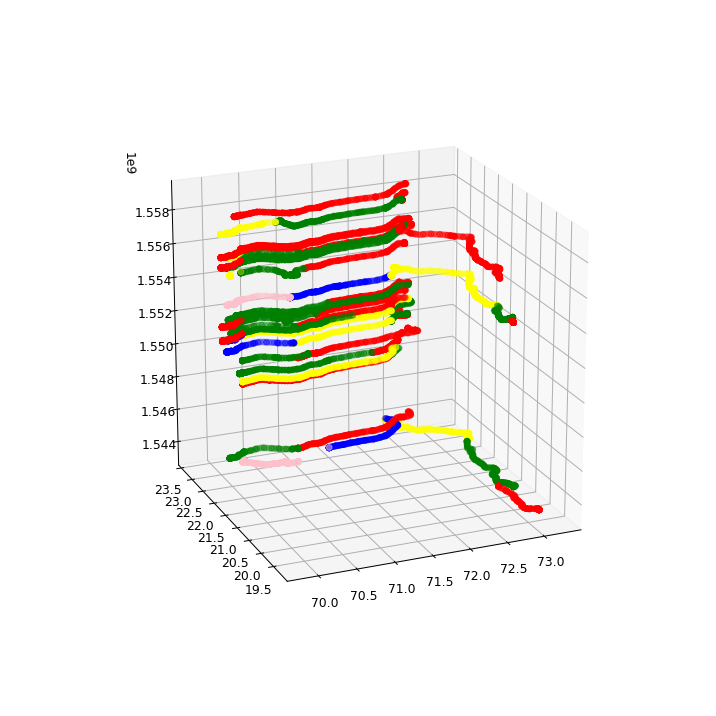

In [54]:
plotTrips(concatTrips(findSameRoutes(trips , 2)[0]) , showHubs=None )

In [7]:
[(18.9387711, 72.8353355),
 (18.5203062, 73.8543185),
 (21.1500964, 79.0127048991187),
 (20.216667, 74.083333),
 (19.4258788, 72.8224901),
 (24.75, 84.5),
 (17.6715272, 75.8975502),
 (19.3025562, 73.0588072),
 (21.0857492, 77.666978),
 (20.5575459, 74.5242544),
 (16.6603273, 74.1960037872403),
 (18.916667, 77.5),
 (21.0137606, 75.5627048),
 (20.77031765, 77.190806035826),
 (18.3983393, 76.562087),
 (19.25, 74.75),
 (20.898, 74.7732),
 (16.6959348, 74.4555755),
 (20.0, 80.0),
 (19.262469, 76.7718),
 (19.96549, 75.8270463555813),
 (21.04572, 75.7808079),
 (19.0308262, 73.0198537),
 (18.9895249, 73.1221935)]

[(18.9387711, 72.8353355),
 (18.5203062, 73.8543185),
 (21.1500964, 79.0127048991187),
 (20.216667, 74.083333),
 (19.4258788, 72.8224901),
 (24.75, 84.5),
 (17.6715272, 75.8975502),
 (19.3025562, 73.0588072),
 (21.0857492, 77.666978),
 (20.5575459, 74.5242544),
 (16.6603273, 74.1960037872403),
 (18.916667, 77.5),
 (21.0137606, 75.5627048),
 (20.77031765, 77.190806035826),
 (18.3983393, 76.562087),
 (19.25, 74.75),
 (20.898, 74.7732),
 (16.6959348, 74.4555755),
 (20.0, 80.0),
 (19.262469, 76.7718),
 (19.96549, 75.8270463555813),
 (21.04572, 75.7808079),
 (19.0308262, 73.0198537),
 (18.9895249, 73.1221935)]

In [81]:
positions

[(18.9387711, 72.8353355),
 (18.5203062, 73.8543185),
 (21.1500964, 79.0127048991187),
 (20.216667, 74.083333),
 (19.4258788, 72.8224901),
 (24.75, 84.5),
 (17.6715272, 75.8975502),
 (19.3025562, 73.0588072),
 (21.0857492, 77.666978),
 (20.5575459, 74.5242544),
 (16.6603273, 74.1960037872403),
 (18.916667, 77.5),
 (21.0137606, 75.5627048),
 (20.77031765, 77.190806035826),
 (18.3983393, 76.562087),
 (19.25, 74.75),
 (20.898, 74.7732),
 (16.6959348, 74.4555755),
 (20.0, 80.0),
 (19.262469, 76.7718),
 (19.96549, 75.8270463555813),
 (21.04572, 75.7808079),
 (19.0308262, 73.0198537),
 (18.9895249, 73.1221935)]

In [83]:
len(city_list_updated)

24

In [73]:
concatTrips([8 , 9])

{8: [57, 83], 9: [25]}